## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [8]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [82]:
# Переименуем столбцы для удобства
pokemon.columns = pokemon.columns.str.lower().str.replace(' ', '_')

In [84]:
# Проверка наличия пропусков в каждом столбце
missing_data = pokemon.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_data)

Количество пропущенных значений в каждом столбце:
pid            0
name           1
class_1        0
class_2      386
hp             0
attack         0
defense        0
sp._atk        0
sp._def        0
speed          0
legendary      0
dtype: int64


In [86]:
# Удаляем пусую строку в Name
pokemon2 = pokemon.dropna(subset=['name'])

In [88]:
pokemon2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        799 non-null    int64 
 1   name       799 non-null    object
 2   class_1    799 non-null    object
 3   class_2    414 non-null    object
 4   hp         799 non-null    int64 
 5   attack     799 non-null    int64 
 6   defense    799 non-null    int64 
 7   sp._atk    799 non-null    int64 
 8   sp._def    799 non-null    int64 
 9   speed      799 non-null    int64 
 10  legendary  799 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.4+ KB


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [15]:
import numpy as np
from scipy import stats
from scipy.stats import shapiro

# Сравним дисперсии

grass_pokemon = pokemon2[(pokemon2['class_1'] == 'Grass') & (pokemon2['class_2'].isna())]
rock_pokemon = pokemon2[(pokemon2['class_1'] == 'Rock') & (pokemon2['class_2'].isna())]

# Проведение теста Левена
stat, p_value = stats.levene(grass_pokemon['attack'], rock_pokemon['attack'])
grass_var = np.var(grass_pokemon['attack'], ddof=1)
rock_var = np.var(rock_pokemon['attack'], ddof=1)

print(f"Статистика Левена: {stat}")
print(f"P-значение: {p_value}")
print(f"Дисперсия скорости для Grass Pokemon: {grass_var}")
print(f"Дисперсия скорости для Rock Pokemon: {rock_var}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")

Статистика Левена: 1.4636003655193421
P-значение: 0.23345957539915027
Дисперсия скорости для Grass Pokemon: 497.403409090909
Дисперсия скорости для Rock Pokemon: 1256.2499999999998
Не отвергаем нулевую гипотезу: дисперсии равны


### Несмотря на то, что дисперсия скорости у покемонов класса Кock выше, чем у покемонов класса Grass, статистически значимых доказательств для утверждения, что эти дисперсии различны, нет. Таким образом, тест Левена указывает на то, что различия в дисперсиях могут быть объяснены случайностью, и нет достаточных оснований для утверждения, что дисперсии существенно различаются.

In [17]:
# Проверка на нормальность

def check_normality(data):
    
    """Условия применения теста Шапиро-Уилка:
    • Размер выборки - тест лучше всего подходит для выборок размером до 2000 наблюдений. 
    • Тип данных - данные должны быть количественными и непрерывными.
    • Независимость наблюдений - данные должны быть независимыми. Тест Шапиро-Уилка не подходит для зависимых данных или временных рядов."""

    stat, p_value = shapiro(data)
    a = 0.05
    
    # Проверка результатов
    if p_value < a:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
        
    print(f"Test statistic: {stat}")
    print(f"p-value: {p_value}")
    
check_normality(grass_pokemon['attack'])
check_normality(rock_pokemon['attack'])

Не отклоняем нулевую гипотезу >> Данные распределены нормально
Test statistic: 0.9623432755470276
p-value: 0.30067211389541626
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Test statistic: 0.984890878200531
p-value: 0.9846584796905518


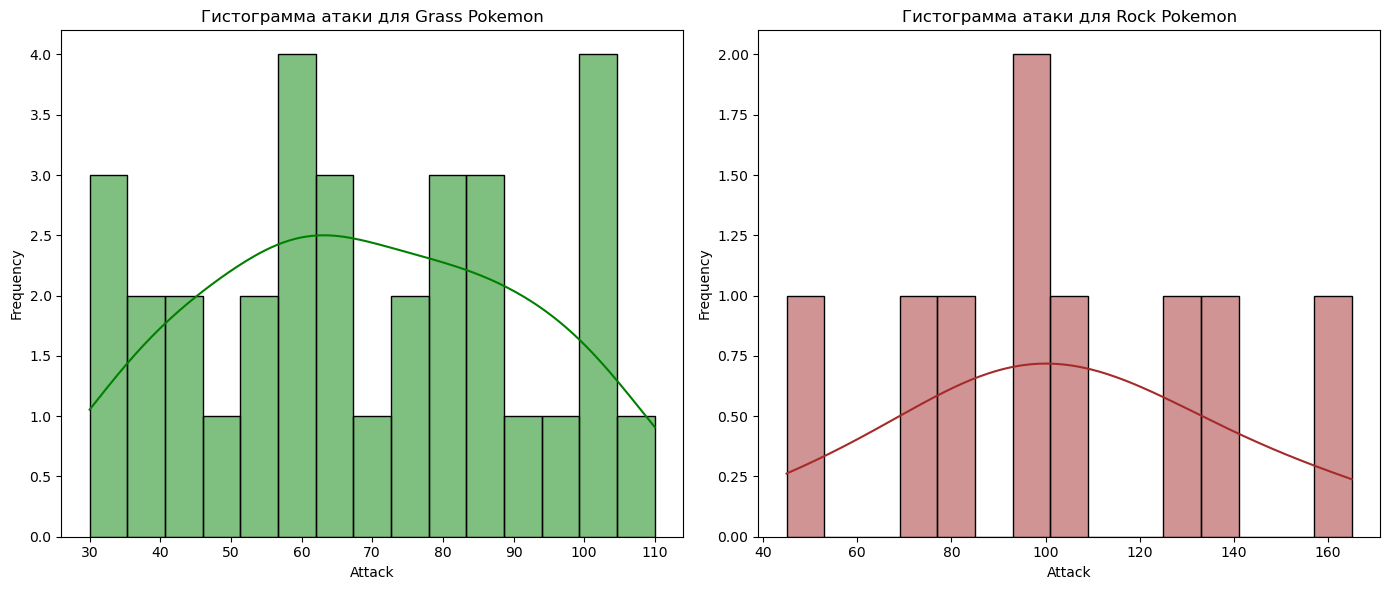

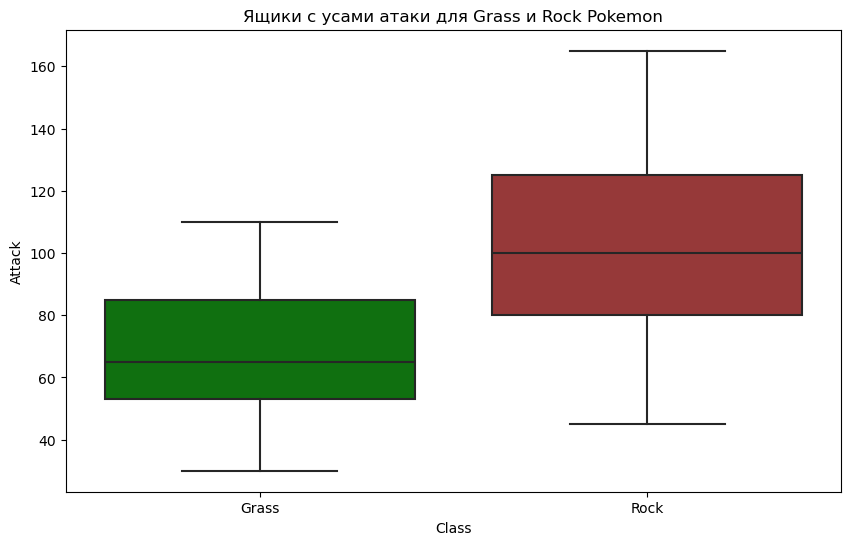

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Посмотрим на данные визуально

# Создание гистограмм
plt.figure(figsize=(14, 6))

# Гистограмма для Grass
plt.subplot(1, 2, 1)
sns.histplot(grass_pokemon['attack'], bins=15, kde=True, color='green')
plt.title('Гистограмма атаки для Grass Pokemon')
plt.xlabel('Attack')
plt.ylabel('Frequency')

# Гистограмма для Rock
plt.subplot(1, 2, 2)
sns.histplot(rock_pokemon['attack'], bins=15, kde=True, color='brown')
plt.title('Гистограмма атаки для Rock Pokemon')
plt.xlabel('Attack')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Создание ящиков с усами (box plots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=[grass_pokemon['attack'], rock_pokemon['attack']], palette=['green', 'brown'])
plt.xticks([0, 1], ['Grass', 'Rock'])
plt.title('Ящики с усами атаки для Grass и Rock Pokemon')
plt.xlabel('Class')
plt.ylabel('Attack')

plt.show()

In [19]:
# Проведение t-теста для сравнения средних значений атаки

t_stat, p_value = stats.ttest_ind(grass_pokemon['attack'], rock_pokemon['attack'], equal_var=False) # параметр указывает на неравные дисперсий.

print(f"t-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения атаки различаются")
    if grass_pokemon['attack'].mean() > rock_pokemon['attack'].mean():
        print("Среднее значение атаки у покемонов класса grass стат.значимо выше, чем у покемонов класса rock")
    else:
        print("Среднее значение атаки у покемонов класса rock стат.значимо выше, чем у покемонов класса grass")
else:
    print("Не отвергаем нулевую гипотезу: средние значения атаки не различаются")
    
print("Среднее значение атаки у покемонов класса grass:", grass_pokemon['attack'].mean())
print("Среднее значение атаки у покемонов класса rock:", rock_pokemon['attack'].mean())
      

t-статистика: -2.7754037281165433
P-значение: 0.019973063777980117
Отвергаем нулевую гипотезу: средние значения атаки различаются
Среднее значение атаки у покемонов класса rock стат.значимо выше, чем у покемонов класса grass
Среднее значение атаки у покемонов класса grass: 68.81818181818181
Среднее значение атаки у покемонов класса rock: 103.33333333333333


### Вывод: опасения профессора Оука не оправданы. Покемоны в классе `Rock` имеют более сильную обычную атаку, чем покемоны в классе `Grass`, а не наоборот.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [22]:
# Сравним дисперсии

water_pokemon = pokemon2[(pokemon2['class_1'] == 'Water') & (pokemon2['class_2'].isna())]
normal_pokemon = pokemon2[(pokemon2['class_1'] == 'Normal') & (pokemon2['class_2'].isna())]

# Проведение теста Левена
stat, p_value = stats.levene(water_pokemon['speed'], normal_pokemon['speed'])
water_var = np.var(water_pokemon['speed'], ddof=1)
normal_var = np.var(normal_pokemon['speed'], ddof=1)

print(f"Статистика Левена: {stat}")
print(f"P-значение: {p_value}")
print(f"Дисперсия скорости для water Pokemon: {water_var}")
print(f"Дисперсия скорости для normal Pokemon: {normal_var}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")

Статистика Левена: 10.428200659342261
P-значение: 0.0016076900681672747
Дисперсия скорости для water Pokemon: 397.2443015780246
Дисперсия скорости для normal Pokemon: 794.7857923497268
Отвергаем нулевую гипотезу: дисперсии не равны


In [23]:
# Проверка на нормальность
    
check_normality(water_pokemon['speed'])
check_normality(normal_pokemon['speed'])

Не отклоняем нулевую гипотезу >> Данные распределены нормально
Test statistic: 0.9750770926475525
p-value: 0.2660429775714874
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Test statistic: 0.9685876965522766
p-value: 0.1184217780828476


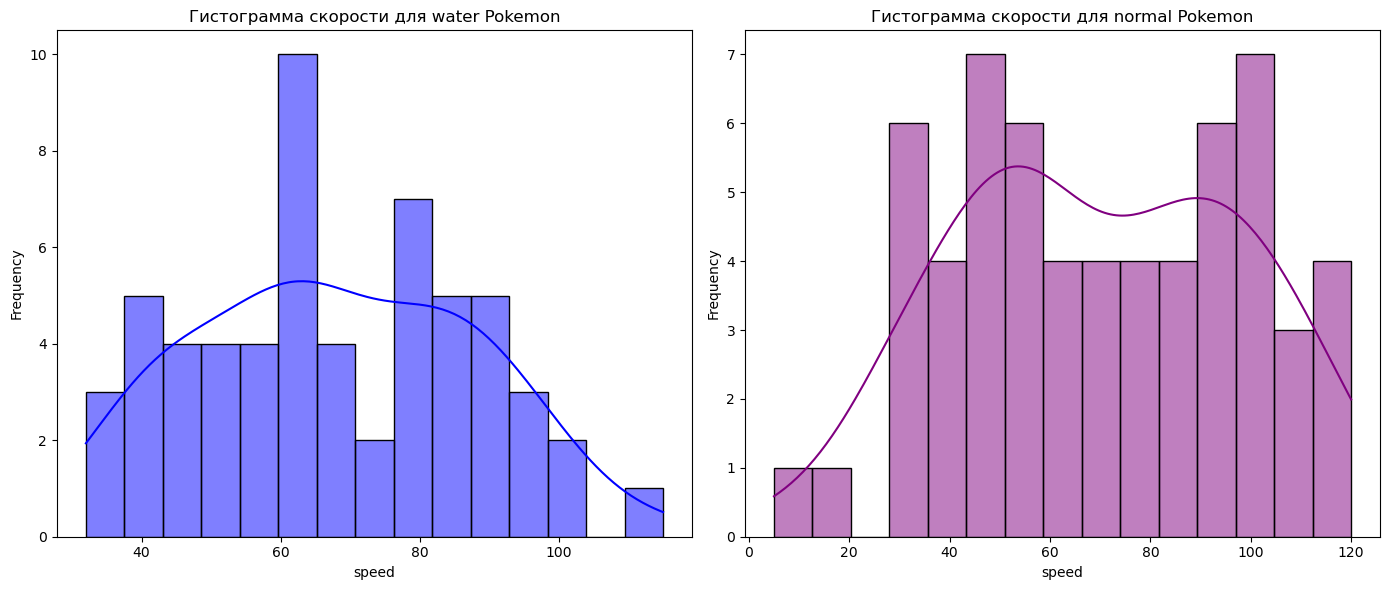

Text(0, 0.5, 'speed')

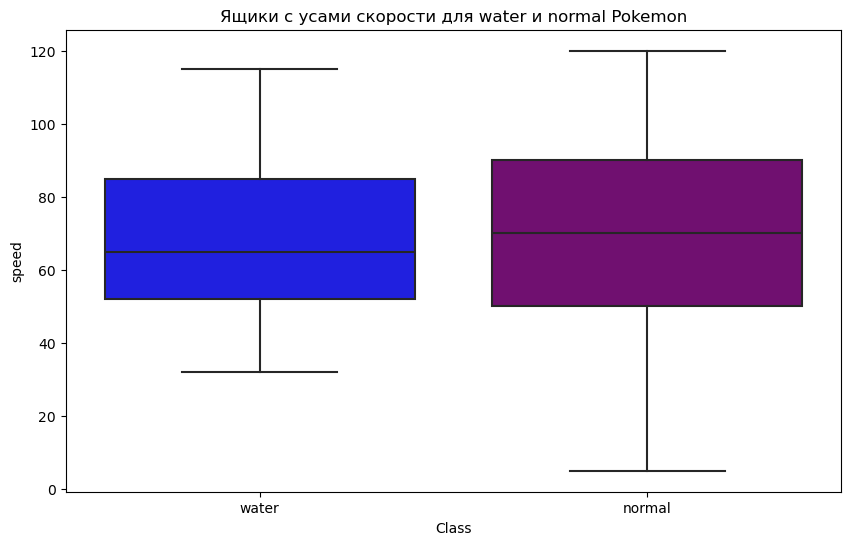

In [24]:
# Посмотрим на данные визуально

# Создание гистограмм
plt.figure(figsize=(14, 6))

# Гистограмма для water
plt.subplot(1, 2, 1)
sns.histplot(water_pokemon['speed'], bins=15, kde=True, color='blue')
plt.title('Гистограмма скорости для water Pokemon')
plt.xlabel('speed')
plt.ylabel('Frequency')

# Гистограмма для normal
plt.subplot(1, 2, 2)
sns.histplot(normal_pokemon['speed'], bins=15, kde=True, color='purple')
plt.title('Гистограмма скорости для normal Pokemon')
plt.xlabel('speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Создание ящиков с усами (box plots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=[water_pokemon['speed'], normal_pokemon['speed']], palette=['blue', 'purple'])
plt.xticks([0, 1], ['water', 'normal'])
plt.title('Ящики с усами скорости для water и normal Pokemon')
plt.xlabel('Class')
plt.ylabel('speed')

In [25]:
# Проведение t-теста для сравнения средних значений скорости

t_stat, p_value = stats.ttest_ind(water_pokemon['speed'], normal_pokemon['speed'], equal_var=False) # параметр указывает на неравные дисперсий.

print(f"t-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения скорости различаются")
    if water_pokemon['speed'].mean() > normal_pokemon['speed'].mean():
        print("Среднее значение скорости у покемонов класса water стат.значимо выше, чем у покемонов класса normal")
    else:
        print("Среднее значение скорости у покемонов класса normal стат.значимо выше, чем у покемонов класса water")
else:
    print("Не отвергаем нулевую гипотезу: средние значения скорости не различаются")
    
print("Среднее значение скорости у покемонов класса Water:", water_pokemon['speed'].mean())
print("Среднее значение скорости у покемонов класса Normal:", normal_pokemon['speed'].mean())

t-статистика: -0.35489147881361166
P-значение: 0.7233619838773336
Не отвергаем нулевую гипотезу: средние значения скорости не различаются
Среднее значение скорости у покемонов класса Water: 67.88135593220339
Среднее значение скорости у покемонов класса Normal: 69.45901639344262


### Вывод: не правда. Покемоны в классе `Water` и `Normal` не отличаются по скорости.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [66]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

test_pokemon = pokemon2[pokemon2['name'].isin(treathed_pokemon)]


# Вывод результата
test_pokemon.head(60)

,pid,name,class_1,class_2,hp,attack,defense,sp._atk,sp._def,speed,legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


### Для сравнения возьмем покемонов с такими же классами, что и в экспериментальной группе.

In [74]:
# Фильтрация данных по типам покемонов (исключая покемонов с именами из массива)

bug_poison_pokemon = pokemon2[(pokemon2['class_1'] == 'Bug') & (pokemon2['class_2'] == 'Poison') & (~pokemon2['name'].isin(treathed_pokemon))]
psychic_pokemon = pokemon2[(pokemon2['class_1'] == 'Psychic') & (pokemon2['class_2'].isna()) & (~pokemon2['name'].isin(treathed_pokemon))]
normal_fighting_pokemon = pokemon2[(pokemon2['class_1'] == 'Normal') & (pokemon2['class_2'] == 'Fighting') & (~pokemon2['name'].isin(treathed_pokemon))]

control_pokemon = pd.concat([bug_poison_pokemon, psychic_pokemon, normal_fighting_pokemon])


check_normality(test_pokemon['speed'])
check_normality(control_pokemon['speed'])

Не отклоняем нулевую гипотезу >> Данные распределены нормально
Test statistic: 0.8274267315864563
p-value: 0.1611907184123993
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Test statistic: 0.941388726234436
p-value: 0.018357951194047928


In [76]:
# Выполнение теста Левена для столбца speed
levene_statistic, p_value = stats.levene(test_pokemon['speed'], control_pokemon['speed'])

# Вывод результатов
print(f"Levene Statistic: {levene_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны.")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны.")


Levene Statistic: 5.101007742332398
P-Value: 0.028306281417450754
Отвергаем нулевую гипотезу: дисперсии не равны.


### Данные распределены ненормально и дисперсии не равны, поэтому исспользуем U-тест.

In [78]:
u_statistic, p_value = stats.mannwhitneyu(test_pokemon['speed'], control_pokemon['speed'], alternative='greater')

# Вывод результатов
print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница в скорости между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы в скорости между группами.")

U-Statistic: 184.0
P-Value: 0.0013208317744400606
Отвергаем нулевую гипотезу: существует статистически значимая разница в скорости между группами.


### Можно предположить, что сыворотка работает.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [98]:
# Фильтрация данных по легендарным и обычным покемонам
legendary_pokemon = pokemon2[pokemon2['legendary'] == True]
non_legendary_pokemon = pokemon2[pokemon2['legendary'] == False]

# Рассчет суммы характеристик для каждого покемона
legendary_sum = legendary_pokemon['hp'] + legendary_pokemon['attack'] + legendary_pokemon['defense']
non_legendary_sum = non_legendary_pokemon['hp'] + non_legendary_pokemon['attack'] + non_legendary_pokemon['defense']

# Проверка равенства дисперсий
statistic, p_value = stats.levene(legendary_sum, non_legendary_sum)

# Вывод результатов
alpha = 0.05
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны.")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны.")

Statistic: 11.269347526347529
P-Value: 0.0008253203431444607
Отвергаем нулевую гипотезу: дисперсии не равны.


In [100]:
# Выполнение t-теста Уэлча
t_statistic, p_value = stats.ttest_ind(legendary_sum, non_legendary_sum, equal_var=False, alternative='greater')

# Вывод результатов
alpha = 0.05
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя сумма характеристик у легендарных покемонов выше.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимого различия в средней сумме характеристик.")


T-Statistic: 15.198078076682357
P-Value: 1.4337640805645998e-26
Отвергаем нулевую гипотезу: средняя сумма характеристик у легендарных покемонов выше.


In [102]:
# Рассчет произведения характеристик для каждого покемона
legendary_sum = legendary_pokemon['hp'] * legendary_pokemon['attack'] * legendary_pokemon['defense']
non_legendary_sum = non_legendary_pokemon['hp'] * non_legendary_pokemon['attack'] * non_legendary_pokemon['defense']

# Выполнение t-теста Уэлча
t_statistic, p_value = stats.ttest_ind(legendary_sum, non_legendary_sum, equal_var=False, alternative='greater')

# Вывод результатов
alpha = 0.05
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя сумма характеристик у легендарных покемонов выше.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимого различия в средней сумме характеристик.")


T-Statistic: 10.078156164918601
P-Value: 1.4493086253742267e-15
Отвергаем нулевую гипотезу: средняя сумма характеристик у легендарных покемонов выше.


### В любом случае средняя сумма характеристик у легендарных покемонов выше.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [104]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [106]:
# Сравним дисперсии

# Фильтрация данных по классам
rock_pokemon = pokemon2[(pokemon2['class_1'] == 'Rock')]
ground_pokemon = pokemon2[(pokemon2['class_1'] == 'Ground')]
steel_pokemon = pokemon2[(pokemon2['class_1'] == 'Steel')]
ice_pokemon = pokemon2[(pokemon2['class_1'] == 'Ice')]

# Выделение значений защиты для каждой группы
rock_defense = rock_pokemon['defense']
ground_defense = ground_pokemon['defense']
steel_defense = steel_pokemon['defense']
ice_defense = ice_pokemon['defense']

# Выполнение теста Левена
statistic, p_value = stats.levene(rock_defense, ground_defense, steel_defense, ice_defense)

# Вывод результатов
alpha = 0.05
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны.")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны.")

Statistic: 0.7138464074765566
P-Value: 0.5455265515458723
Не отвергаем нулевую гипотезу: дисперсии равны.


In [127]:
# Выполнение однофакторного ANOVA
f_statistic, p_value = stats.f_oneway(rock_defense, ground_defense, steel_defense, ice_defense)

# Вывод результатов
alpha = 0.05
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница в защите между классами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы в защите между классами.")

print(rock_defense.mean())
print(ground_defense.mean())
print(steel_defense.mean())
print(ice_defense.mean())

F-Statistic: 10.576882027817977
P-Value: 3.0803014649204294e-06
Отвергаем нулевую гипотезу: существует статистически значимая разница в защите между классами.
100.79545454545455
84.84375
126.37037037037037
71.41666666666667


### Профессор неправ: классы 'Rock', 'Ground', 'Steel' и 'Ice' имеют статистически значимые различия по силе обычной защиты.